# Estatística & Probabilidade - 2022/02

## Projeto 02 - Uma introdução ao aprendizado de máquina

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `uuc2d5e`

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é sábado 06/01/2023 às 23h59. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, e o projeto deve ser redigido na forma de um relatório incluindo os códigos. Para isso, use a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em ``Atividades"
            
  - No tema "Projetos", clique em "Projeto 02" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 02".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada aluno deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

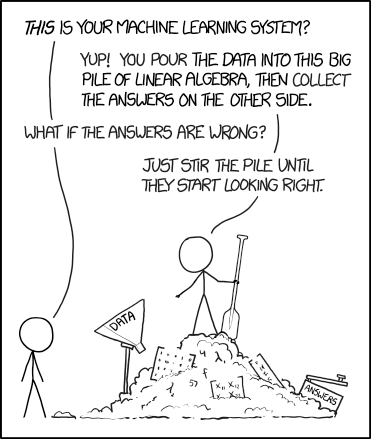

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})) = \begin{cases} 0, &\text{ se } Y = g(\mathbf{X}) \\ 1, &\text{ se } Y \neq g(\mathbf{X}) \end{cases}$$

Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo ou discreto
- Se $\mathbf{X}$ é contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes


### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados.

In [2]:
# Baixando a base de dados

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

/home/igor/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Vendo o cabeçalho referente à X, bem como seu tamanho

print(X.shape)
X.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Vendo o cabeçalho referente à y, bem como seu tamanho

print(y.shape)
y.head()

(70000,)


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

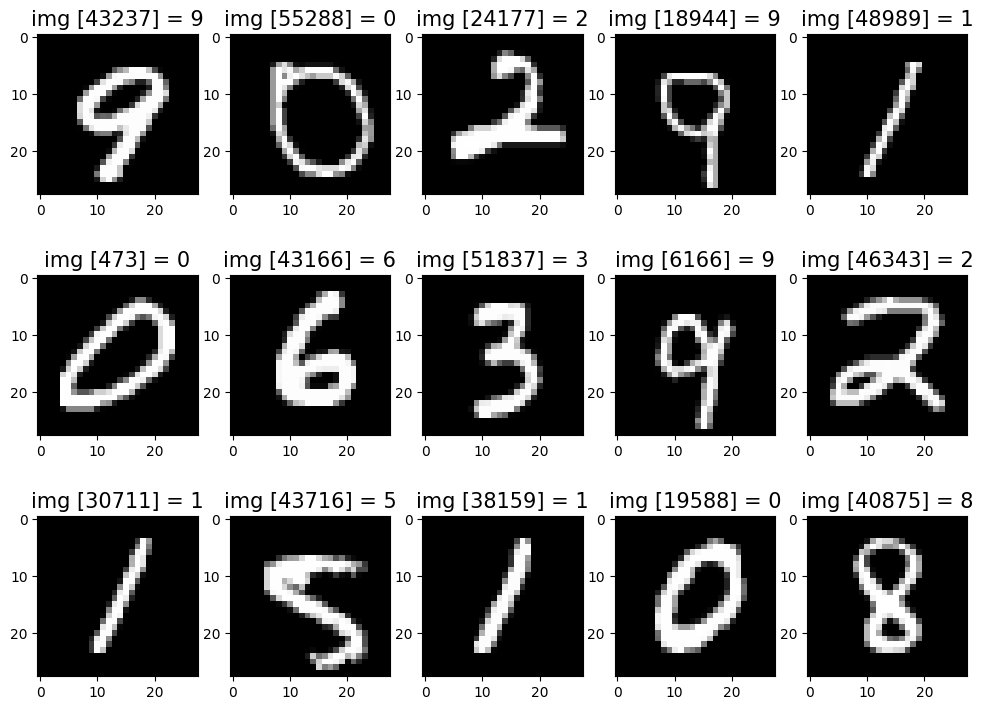

In [4]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts, font=15):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0].reshape(28, 28)        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = font);        
        index += 1

random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 6


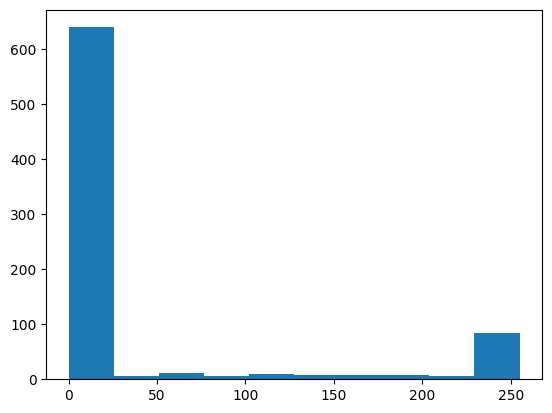

In [7]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando o classificador de Bayes ingênuo gaussiano que discutimos acima.

**QUESTÃO 1:** O classificador de Bayes ingênuo Gaussiano tem duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

### Resposta: 
#### Independência: 
Bom, inicialmente analisando o tema 1 (independência) podemos primeiro descrever o que significa e depois explicar o motivo dessa hipótese não ser verdadeira. O significado de assumirmos que os atributos são independentes entetre sí, condicionado as classes, é o mesmo que assumir que os pixels de um mesmo número não tem relação entre sí. Isto é, o *MESMO* pixel de duas imagens de 1(exemplo) não possuem relação entre sí, um estar com valor 255 não diz nada sobre os outros. Essa hipótese está errada, isso pois, os número tendem a ser desenhados da mesma forma. Logo, um mesmo número tende, embora possa não ser 100% das vezes pois podemos desenhar o número em locais diferentes da imagem, mas eles tendem a se concentrar no centro e por conta disso tendem a ter um comportamento parecido.

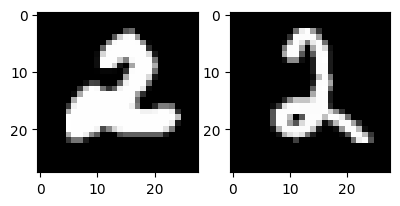

In [5]:
number = np.random.randint(0,10)
filtered = X[y==str(number)]
index = np.random.randint(0,500)
show_images(filtered.values[index:index+2], ["",""])


Fiz esse pequeno trecho de código busca demonstrar o que eu havia argumentado(achei que ficaria melhor que o histograma da possição dos pixels acima pois ele é muito poluido pelo valor 0), aqui podemos ver que claramente há uma dependência entre dois números de mesma classe :)

#### Distribuição Normal.
Seguindo para a analise da distribuição normal, esperamos que se os atributos(pixels) sigam uma distribuição normal condicionada as classes(numeros), teremos um gráfico normal com relação a distruição de valores desses pixels. Isso até ocorre quando consideramos pixels extremos da imagem, pois são sempre(quase sempre, praticamente sempre) 0. Podemos ver isso no seguinte gráfico:

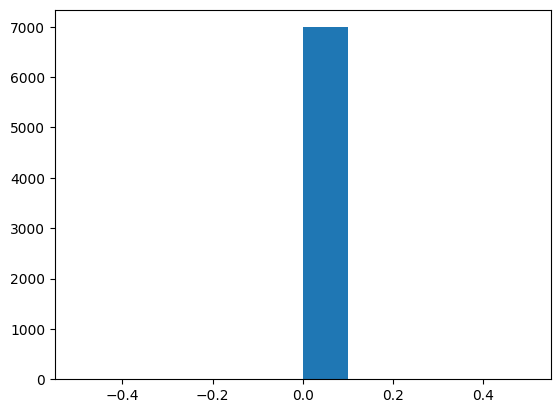

In [6]:
plt.hist(filtered['pixel1'])
plt.show()


Agora, precisamos ver se esse comportamento se repete em valores que de fato ocorre alguma escrita. Podemos fazer isso procurando em uma imagem base, escolhida aleatóriamente, o primeiro valor que de fato tem escrita nela. Após isso, pegamos a posição desse pixel e usamos como base para fazer um gráfico dele e dos pixels ao entorno. Faremos quatro gráficos, o primeiro com um pixel com cor, o seguinte a ele, o logo abaixo(+28) e o proximo a esse.

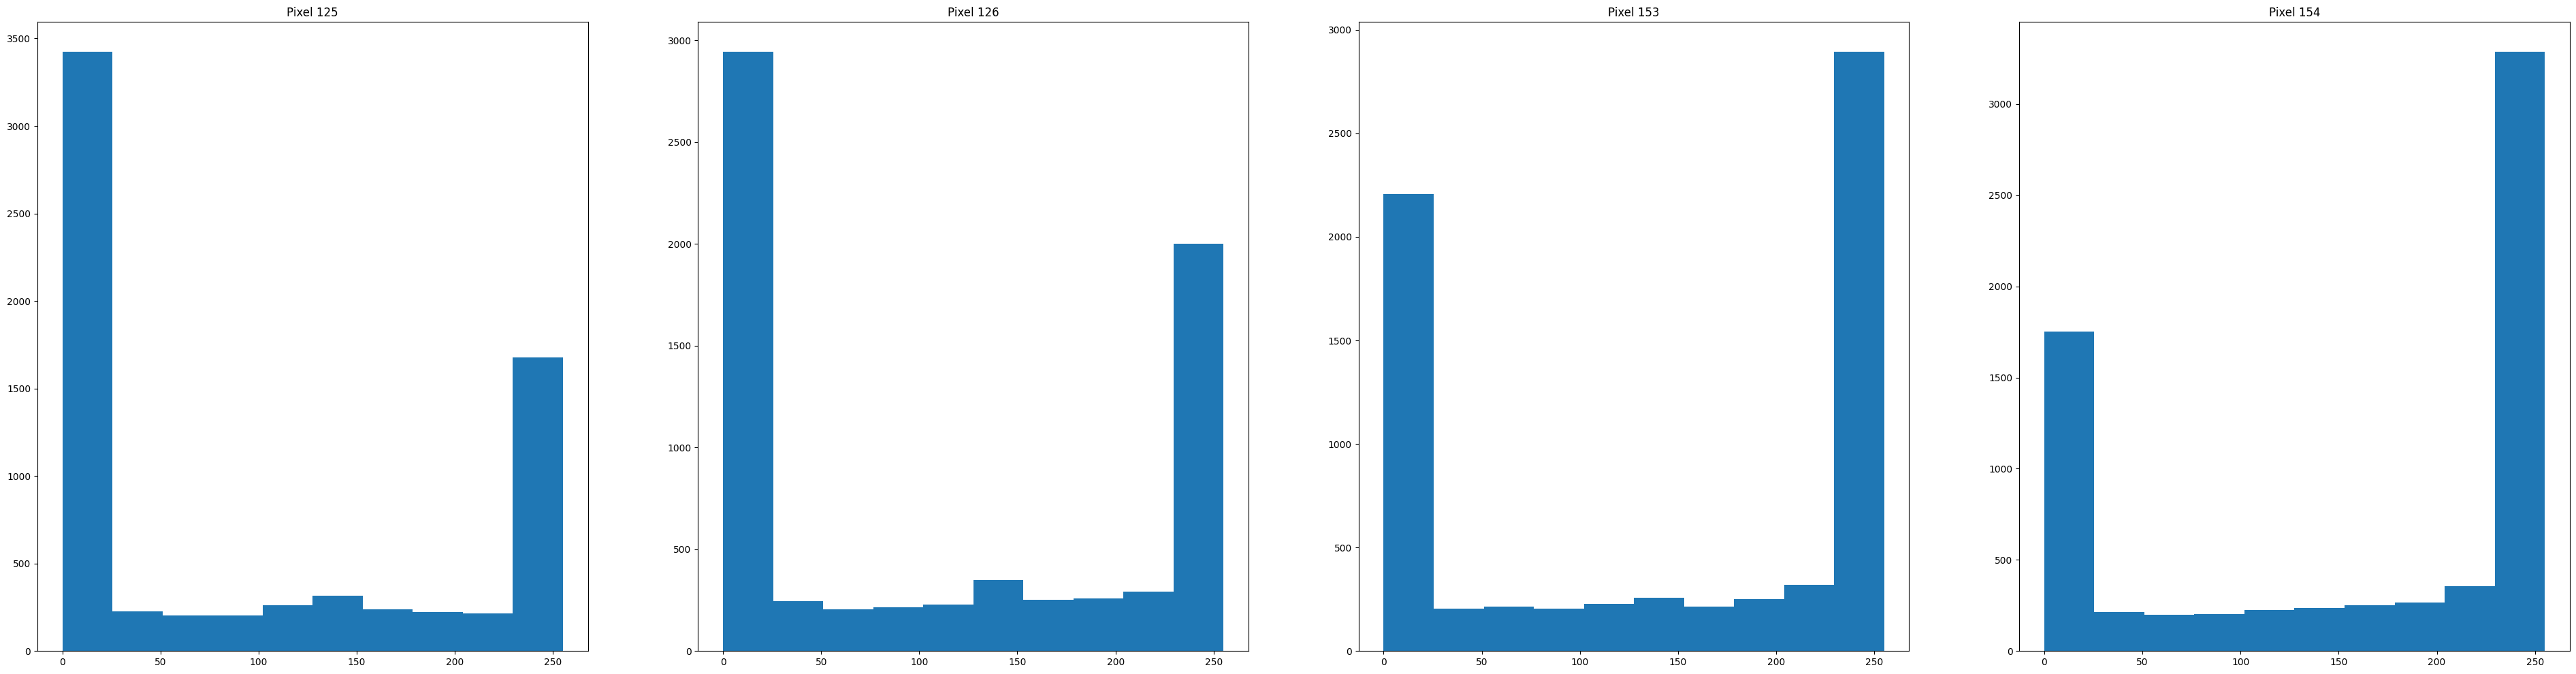

In [7]:
imgNumber = np.random.randint(0,500)
indexes = []
for i in range(784):
    if (filtered.values[imgNumber][i]>0):
        indexes = [i,i+1,i+28,i+29]
        break
index = 1
plt.figure(figsize=(48, 12))#não entendi como isso aqui funcionava mas foi o melhor que eu consegui fazer
for i in indexes:
    plt.subplot(1,4,index)
    text = 'pixel' + str(i)
    plt.title(f'Pixel {i}')
    plt.hist(X[text].values[y==str(number)])
    index+=1
plt.show()

Com isso, nós vemos que os pixel(atributos) também não seguem uma distribuição normal, fazendo com que essa hipótese também esteja errada. Com relação a razoabilidade disso aplicado ao problema, só poderemos afirmar quando olharmos o resultado, mas se as duas hipoteses que assumimos estão erradas, seria surpreendente se performace de forma ótima ou proximo dela.

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

In [8]:
# ATENÇÃO! Se você rodar essa célula mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso para evitar erros numéricos.

X = X/255

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** A classe que vamos usar para fazer o nosso procedimento é a `GaussianNB`, localizada dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), e a página direcionada através do *link* "User Guide", onde encontra-se a formulação matemática por trás do método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

### Resposta:
Primeiro, iremos analisar o que os métodos da classe GaussianNB fazem. Começaremos pelo fit.

#### Fit:
Ao ler a documentação do scikit learn descobri que o método em questão faz o ajuste das médias e das variâncias para nossas variáveis aleatórias levando em conta sua classe. Isto é, passando para ela nossa base de teste, e suas respectivas classes, ela ajusta a média e variância dos pixels que possuem o mesmo número. Inclusive, faz nesse seguinte trecho que achei enquanto pesquisava:

```python
 new_theta, new_sigma = self._update_mean_variance(
                self.class_count_[i], self.theta_[i, :], self.var_[i, :], X_i, sw_i
            )
self.theta_[i, :] = new_theta
self.var_[i, :] = new_sigma
self.class_count_[i] += N_i

```

Nesse trecho, podemos ver esse método dentro de um for(que não recortei pq ocorriam uma série de outras coisas antes e só esse trecho nos interessa) chamando a cada interação um método que calcula uma nova média e variância com base na anterior e no proximo pixel calculado e após isso atualiza o valor dela com o que foi retornado do método.


#### Predict
Aqui no método predict classifica em qual classe o nosso dado pertence fazendo o cálculo descrito na página do GaussianNB. Ele faz isso chamando um método "_joint_log_likelihood(X)" e nesse método ele calcula algo próximo do que foi informado na página do GaussianNB mas ao mesmo tempo diferente. Pode ser que na verdade seja a mesma coisa, mas eu que não conheço as equivalências ou aproximações usadas.

```python
 def _joint_log_likelihood(self, X):
        joint_log_likelihood = []
        for i in range(np.size(self.classes_)):
            jointi = np.log(self.class_prior_[i])
            n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
            n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
            joint_log_likelihood.append(jointi + n_ij)

        joint_log_likelihood = np.array(joint_log_likelihood).T
        return joint_log_likelihood

```
$$
\begin{equation*}
P(x_{i}\mid y) = \frac{1}{\sqrt{2\pi \sigma_y^{2}}} \exp \left(-\frac{(x_{i} -\mu_{y})^2}{2\sigma_y^{2}} \right)
\end{equation*}
$$

Aqui, podemos ver ele fazendo um for dentre as possiveis classes(que no nosso caso seriam os digitos) e calculado o n_ij que é a primeira parte do calculo, onde temos $2*\pi* a variância$ que não está elevada ao quadrado e também não temos raiz quadrada. Na segunda parte diminuimos o que encontramos anteriormente de $(X-theta)^2$ e diminuimos pela variância, mas novamente, não elevamos ao quadrado e multiplicamos por meio. Após procurar um pouco enquanto escrevia o cálculo da Predict_Proba, acabei achando de onde saiu esse calculo anternativo "Dado que logaritmo é uma função contínua estritamente crescente sobre o contradomínio da verossimilhança, os valores que maximizam a verossimilhança também maximizarão seu logaritmo. Como maximizar o logaritmo geralmente requer álgebra mais simples, é o logaritmo que é maximizado abaixo. " [Fonte: Wikipedia]. Por ser uma algebra mais simples e possivelmente mais rápida computacionalmente(se eu não estou completamente louco raiz quadrada só pode ser calculada usando Newton–Raphson que é uma loucura de lento), eles usam esse método para calcular a Máxima verossimilhança!!!! 

#### :D

$$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

```python
        check_is_fitted(self)
        X = self._check_X(X)
        jll = self._joint_log_likelihood(X)
        return self.classes_[np.argmax(jll, axis=1)]
```



#### Predict_Proba
A diferença desse método é que ele não retorna o número com a maior probabilidade de ser, ele retorna a probabilidade de ser cada um dos números. Ele faz o mesmo calculo do Predict anterior, mas ao invés de retornar o de maior probabilidade ele retorna todas as probabilidades.
```python
 def predict_log_proba(self, X):
        check_is_fitted(self)
        X = self._check_X(X)
        jll = self._joint_log_likelihood(X)#calculo anterior
        # normalize by P(x) = P(f_1, ..., f_n)
        log_prob_x = logsumexp(jll, axis=1)
        return jll - np.atleast_2d(log_prob_x).T
```
Ele calcula as probabilidades com a função anterior e retorna ela diminuida do seu log(possivelmente porque a verossimilhança também está em log). Por fim, ele retorna o valor voltando de log para probabilidade:
```python
   def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))

```

E assim esses métodos calculam a que classe pertênce cada imagem, não sei se precisava ir tão fundo na explicação, mas foi bem divertido achar de onde saia essas coisas 

**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` para treinar um modelo de Bayes ingênuo gaussiano nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

### Resposta:
Bom, inicialmente vamos começar com o treinamento.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)
preditor = GaussianNB()
preditor.fit(X_train, y_train)

GaussianNB()

Agora que treinamos, podemos fazer uns testes e ver o resultado.

A taxa de erro foi: 44.629999999999995% e a de acertos foi 55.370000000000005


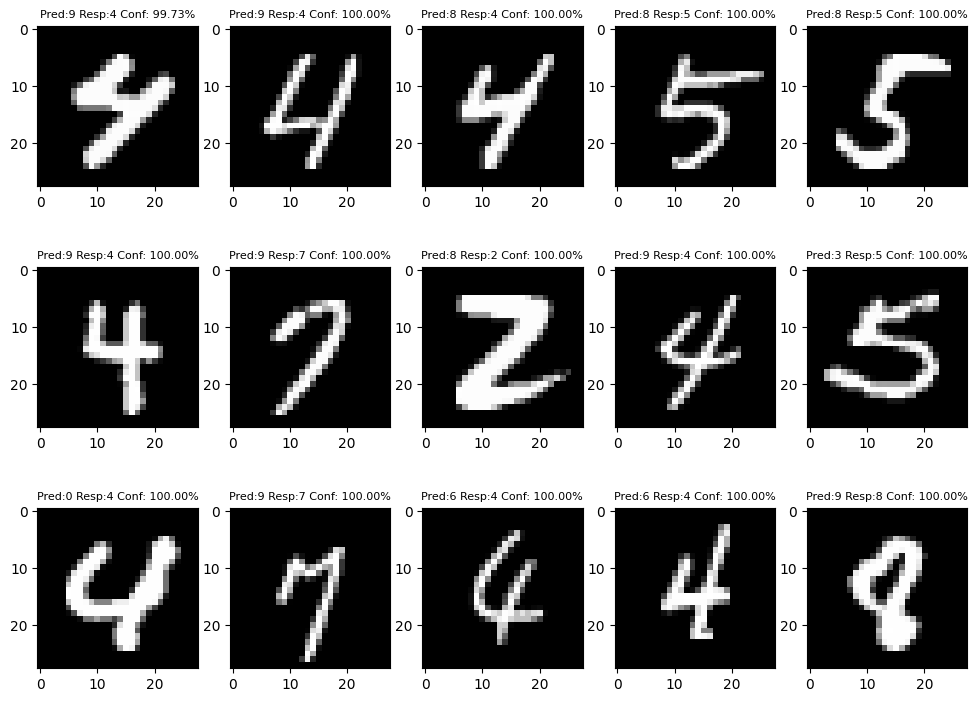

In [18]:
predicao = preditor.predict(X_test)
predicaoPorc = preditor.predict_proba(X_test)
erros = 0
errosIndex = []
for i in range(len(y_test)):
    if(y_test.values[i]!=predicao[i]):
        erros +=1
        errosIndex.append(i)
print(f'A taxa de erro foi: {(erros/len(y_test))*100}% e a de acertos foi {100-(erros/len(y_test))*100}')
errosLista = []
for i in range(15):
    errosLista.append([X_test.values[errosIndex[i]], f'Pred:{predicao[errosIndex[i]]} Resp:{y_test.values[errosIndex[i]]} Conf: {max(predicaoPorc[errosIndex[i]])*100:.2f}%'])
show_images(list(map(lambda x:x[0],errosLista)),list(map(lambda x: x[1], errosLista)), 8)

Já que vimos os que ele errou, podemos ver também os acertos!

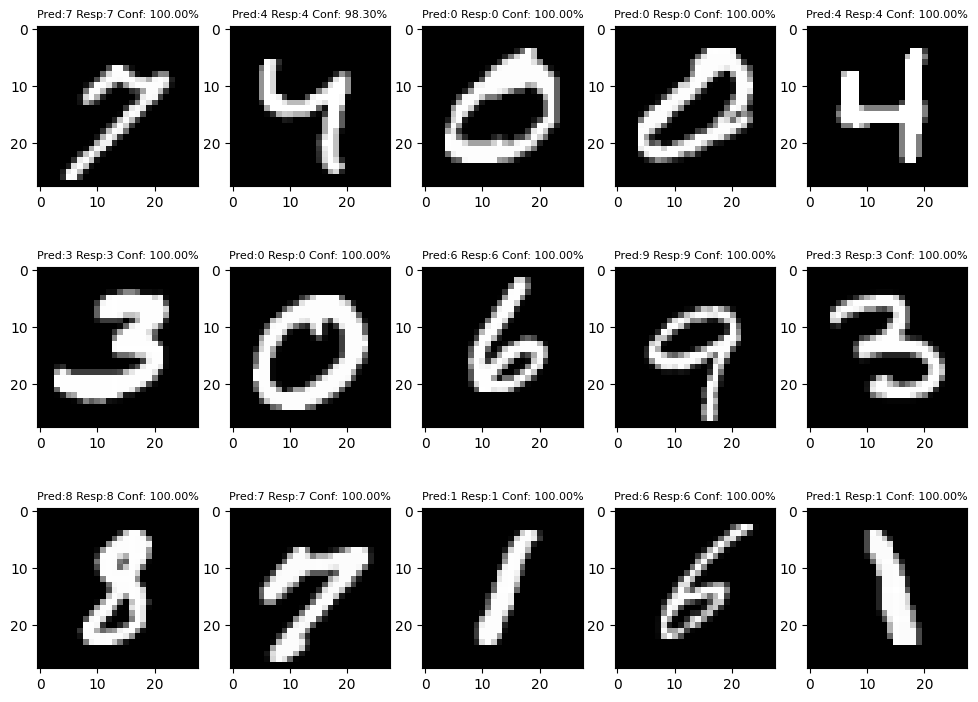

In [19]:
acertosIndex = []
for i in range(len(y_test)):
    if(y_test.values[i]==predicao[i]):
        acertosIndex.append(i)
    if(len(acertosIndex) > 14):
        break
acertosLista = []
for i in range(len(acertosIndex)):
    acertosLista.append([X_test.values[acertosIndex[i]], f'Pred:{predicao[acertosIndex[i]]} Resp:{y_test.values[acertosIndex[i]]} Conf: {max(predicaoPorc[acertosIndex[i]])*100:.2f}%'])
show_images(list(map(lambda x:x[0],acertosLista)),list(map(lambda x: x[1], acertosLista)), 8)

**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

O calculo do tanto de parametros que devemos estivar deve levar em conta: a quantidade de pixels na imagem(784), a estivativa de média e variância para cada um deles(2) e para quantas classes precisamos estimar esses valores(10). Logo, teriamos $784*10*2=15680$. Uma forma de confirmar esse valor é usar nosso código ao nosso favor. Isso pois, após ler a documentação na questão 3 eu descobri que essas informações na verdade estão gravadas na classe GaussianNB, então podemos só pegar esses valores de lá :D

In [13]:
xMedia,yMedia = preditor.theta_.shape
xVari,yVari = preditor.var_.shape

print(xMedia*yMedia + xVari*yVari)

15680


Assim, temos que na verdade, aproximando camaradamente, precisamos estimar 1/4 dos valores que temos de observação. Isto é, a quantidade de parâmetos que queremos estimar é 1/4 dos valores que temos em nossa posse para os estima-los. Ainda assim, temos mais valores do que parâmetros, temos 4x mais valores para ser preciso. Mas, comparado com a situação que estamos acostumados a trabalhar em sala de aula, é absurdamente mais próximo. Como ainda temos uma "folga" acredito que eventuais erros no método não se darão por falta de observações, mas sim por outros motivos(discutidos mais a frente).

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

### Resposta:

#### Matriz de Confusão:
A matriz de confusão é um método de avaliar/visualizar os dados de predições binárias em um problema de classificação. Ela nos informa algo melhor do que "porcentagem de acerto" pois não se limita apenas a isso, ela aponta se as qualidades ou defeitos do método estão nas predições positivas e negativas. Por exemplo, em uma amostra de 100 pessoas, com 90 positivas para alguma característica, uma classificação que coloque os 100 como positivos teria 90% de acerto, mas olhando pela matriz podemos visualizar que ela na verdade falha para todos os casos negativos verdadeiros. Essa matriz é feita(normalmente, para os casos binários) como uma matriz 2x2 na qual as linhas representam, na ordem, casos positidos e negativos e as coluas as predições feitas. Além disso, com base nessa tabela podemos tirar uma série de métricas que nos ajudam a classificar o desempenho do classificador. Mas, essas informações ditas anteriormente são referentes apenas ao caso binário, que não é o caso que estamos trabalhando.

Com base nesse caso, podemos extender para uma matriz com mais de 2 categorias(nosso caso). Ela segue o mesmo padrão, as linhas representam os valores reais e as colunas as predições, com o tamanho dependendo do número de categorias. Nesse caso, a diagonal principal representa os acertos e as demais "casas" representam os erros, valendo-se das mesma métricas que se podem ser tiradas da classificação binomial.

#### Precisão e Acurácia:
Acurácia e precisão são duas medidas para avaliar o erro observado de um método. Embora usualmente sejam confundidos como a mesma coisa, acurácia é o quanto se acerta na previsão enquanto precisão é o quão perto suas medidas estão umas das outras. Dentro da matriz de confusão, uma das métricas que é possível de extrair dela é justamente a acurácia, sendo calculada pelo total de acertos sobre o total de casos(repare que essa definição é abrangente e serve tanto para a binomial como para a multiclasse).


#### Score:
O método score retorna a acurácia média dos dados medidos. Ele faz isso utilizando uma função chamada accuracy_score:

```python
  def score(self, X, y, sample_weight=None):
        from .metrics import accuracy_score
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

```
aqui, a função importa a accuracy_score e passa para ela os valores verdadeiros e chama o método predict que explicamos anteriormente, que irá passar os dados preditados. Essa função accuracy_score tem como padrão a normalização, isso é, ela vai retornar um valor entre 0 e 1 medindo a taxa de acerto, caso seja desativado a normalização ela retorna o numero de acertos.
```python
def accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None):
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    check_consistent_length(y_true, y_pred, sample_weight)
    if y_type.startswith("multilabel"):
        differing_labels = count_nonzero(y_true - y_pred, axis=1)
        score = differing_labels == 0
    else:
        score = y_true == y_pred

    return _weighted_sum(score, sample_weight, normalize)

```
No caso de uma tabela multiclasse(o nosso caso) ele calcula os acertos fazendo a diminuição das duas matrizes(ou vetores) de e verificando os casos que deram 0, ou seja, os casos que os valores eram iguais. Depois disso, a função _weighted_sum faz somente a soma (com peso ou não) dos valores e tira a média entre eles. Caso os valores tenham pesos ela faz o dot product entre os vetores. 

Assim, podemos ver que a função score nos retorna exatamente a acurácia do método.

In [22]:

print(f'Temos uma acurácia de {preditor.score(X_test, y_test)*100:.2f}%')

Temos uma acurácia de 55.37%


A cada iteração do nosso classificador no método de fit ele vai "incorporando" a média as diferentes formas de grafia presentes no nosso dataSet. Em primeiro momento, após analisar somente um digito ele tem na verdade o próprio dígito como média, na segunda ele tem algo que é um amálgama dos dois digitos. Então, se esses dois tiverem grafias ligeiramente diferentes de se escrever o mesmo número na verdade o que teremos é que o valor não vai nem ser algo parecido com o digito em questão. Por conta disso, leva várias iterações até que o valor da média incorpore uma grafia geral próxima das diversas formas de se escrever o digito e que consiga de forma minimamente satisfatória reconhecer eles. Assim, não faz sentido analizar a acurácia nesse momento pois ele não está pronto de fato para fazer previsões, ele está absorvendo informações sobre como irá fazer.

**QUESTÃO 6:** Use o código dado abaixo para exibir a matriz de confusão, bem como uma representação gráfica mais amigável dela. Analise os erros cometidos pelo classificador e tente justificá-los, com base nas hipóteses do classificador e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional de nosso classificador! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

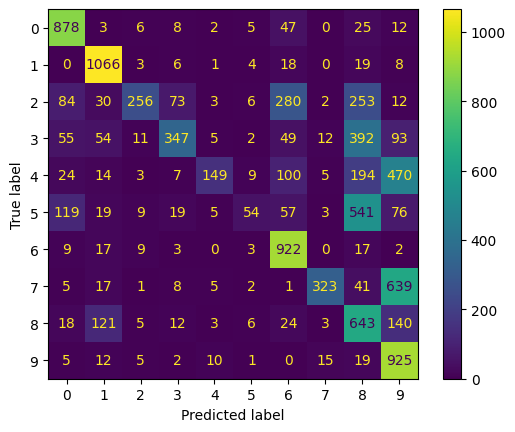

In [15]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

labels = y.cat.categories
cm = confusion_matrix(y_test, predicao, labels=labels)
#print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

### Resposta
Bom, podemos começar analisando o número que foi menos correto:5 
Conseguimos analisar que em boa parte dos casos ele acusou o valor 0 e 8. Analisando superficialmente vemos que os valores 0 e 8 por sí só são "parecidos" o que indica que algo em comum neles está causando a confusão, mais predominante para o 8.


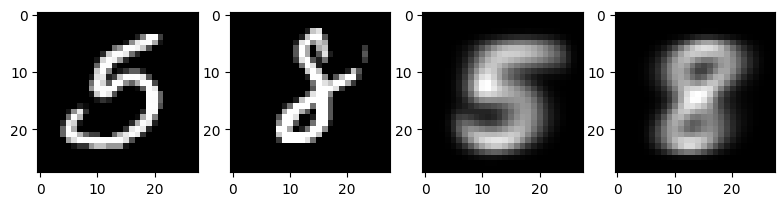

In [79]:
digito5 = (X.values[y=='5']*255)
digito8 = X.values[y=='8']*255
index = np.random.randint(0,2000)
images = [digito5[index].reshape(28, 28),digito8[index].reshape(28, 28),(preditor.theta_[5]*255).reshape(28, 28),(preditor.theta_[8]*255).reshape(28, 28)]

show_images(images, ["","","",""])

Podemos ver ao analisar os pixels que o número 5 quase que está contido dentro do número 8, isto é, basicamente todos os pixels que costumam estar com valores > 0 no numero 5 também estão com valores maiores que 0 no. Não só isso, como vemos que alguns 5(após rodar por um tempo) são escritos de forma diferente da grafia que a média do 5 de média ficou, mas ainda assim está "dentro" da média do 8, fazendo com que nos cálculos de verossimilhança tenha uma maior com o 8. Lógico que, isso é considerando que temos indepêndencia entre eles, o que sabemos que não é o caso, visto que os números tem um formato padrão de "desenho", sabemos que os pixels entre classes acabam por serem dependentes.

A mesma análise pode ser feitara o 4 que também foi confundido com o 9

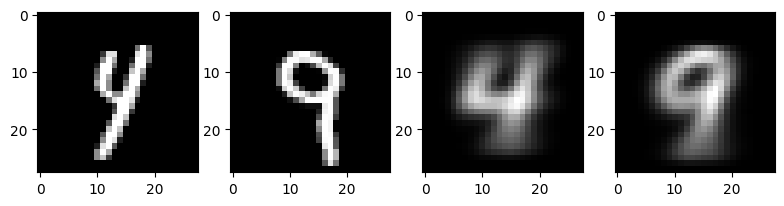

In [90]:
digito4 = (X.values[y=='4']*255)
digito9 = X.values[y=='9']*255
index = np.random.randint(0,2000)
images = [digito4[index].reshape(28, 28),digito9[index].reshape(28, 28),(preditor.theta_[4]*255).reshape(28, 28),(preditor.theta_[9]*255).reshape(28, 28)]

show_images(images, ["","","",""])

Vemos que os pixels da média do 9 possuem uma grande semelhança também com alguma das grafias dos 4. O mesmo ocorreria com o 3 sendo predito como 8.

A acurácia foi calculada na questão anterior, basta repassar o código para essa:

In [91]:
print(f'Temos uma acurácia de {preditor.score(X_test, y_test)*100:.2f}%')

Temos uma acurácia de 55.37%


Com relação ao quão bom o nosso classificador é: depende
Ele é um bom classificador pra reconhecer digitor de algo como placas de carros e aplicar multas automaticamente? Não, com 55% de acurácia seria loucura colocar ele no controle desse tipo de sistema

Como algo extremamente barato(computacionalmente falando) de se treinar, quase instantâneo e que tem sim sua utilidade? Com certeza. Ele realiza a identificação em tempo de execução, acredito que seja um modelo bem okay para aprendizado.

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

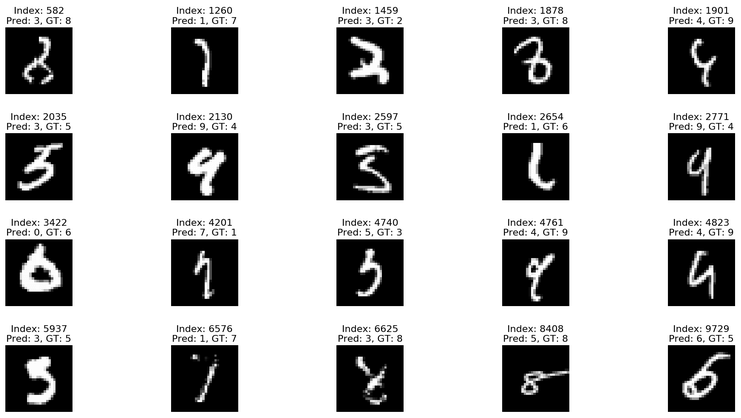

Como vimos ao percorrer do trabalho, nossas duas hipóteses sobre independência e normalidade dos valores estavam erradas, uma melhora significativa poderia ser encontrada se esses pontos fossem levados em conta pois descreveria melhor os dados que temos para classificar. Poderiamos também, mudar completamente o classificador, gerando claro, um custo a isso. Conforme sugerido pelo professor em sala de aula, talvez modelos como o "Linear Discriminant Analysis" possam ter uma performance melhor.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
preditor = LinearDiscriminantAnalysis()
preditor.fit(X_train, y_train)
print(f'Temos uma acurácia de {preditor.score(X_test, y_test)*100:.2f}%')

Temos uma acurácia de 86.82%


Vemos algo já bem mais aceitavel para esse modelo, ao custo de que levamos quase 40s para rodar ele em um notebook, enquanto o outro levamos manos de 5. Arredondando, aumentamos em 8x o tempo de processamento para uma melhora de uns 30%. Seguindo essa linha exploratória, o professor também recomendou, avisando que também seria mais pesado o "Quadratic Discriminant Analysis"

In [93]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
preditor = QuadraticDiscriminantAnalysis()
preditor.fit(X_train, y_train)
print(f'Temos uma acurácia de {preditor.score(X_test, y_test)*100:.2f}%')

/home/igor/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Temos uma acurácia de 55.79%


Aqui, não temos uma melhora. Mas, temos uma explicação!!!
"If in the QDA model one assumes that the covariance matrices are diagonal, then the inputs are assumed to be conditionally independent in each class, and the resulting classifier is equivalent to the Gaussian Naive Bayes classifier" [Fonte: Documentação] Foi isso que ocorrou no nosso código, o resultado final foi idêntico ao GaussianNB com um custo de tempo bem maior...

Agora, vamos tentar com uma loucura minha: Rede Neural. Como o cálculo do GaussianNB foi todo explicado para nós antes de usarmos ele, vou tentar da forma mais breve possível explicar o Wue são rede neurais totalmente freestyle sem compromisso científico :D
Da forma como vou tentar construir, cada um dos pixels da imagem vão ser um "neurônio" de entrada na rede. Então, a imagem inteira irá ser passada para a rede neural como input. Após isso, todos esses 784 neurônios vão ter uma ligação *para cada* neurônio seguinte. E isso irá se repetir por toda a rede até que no final teremos 10 neurônios de saída representando os possíveis dígitos.

Essa ligação que eu contei na verdade é um calculo algébrico bem simples e precisamos entender ele para saber como a rede neural funciona. Como falado, cada pixel será um neurônio que estará ativado conforme o seu nível de branco(visto que dividimos as cores por 255) teremos uma porcentagem do quão ativado ele está. Após isso,cada uma das ligações fará o seguinte calculo para o neurônio seguinte:


$N_{12} = X_1*W_1+X_2*W_2+...+X_{784}*W_{784} $

Nesse exemplo o $N_{12}$ é o primeiro neurônio da segunda camada(a primeira depois da camada de entrada). Cada um dos X são os valores em um dos neurônios de entrada que tivemos e os W são os pessos que cada um desses neurônios tem na ligação com o Neurônio $N_{12}$. Após isso, é adicionado um "tempero" a essa soma chamado de bias que é um valor que pode ser negativo ou positivo, ele serve para ser mais um parâmeto para se ajustar e pode "shiftar" a função de ativação, que vamos falar a seguir.

Como eu disse anteriormente, os dados da entrada vão estar contidos num intervalo de 0 a 1 que vão representar o quão ativados os neurônios estão, mas esse somatórios gigantesco mais o bias não nos garante que no final de tudo teremos um valor entra 0 e 1, é pra isso que aplicamos a esse resultado algo chamado "função de ativação" que retorna pra gente um valor(tipicamente entre 0 e 1 mas tem alguns negativos acho) que mantêm a constância na rede neural. Com essas explicações, nosso cálculo ficou assim até o momento:

$N_{12} = f_{act}(X_1*W_1+X_2*W_2+...+X_{784}*W_{784} + bias)$

Assim, no final de tudo temos os 10 neurônios de saida que vão estar ativados num valor entre 0 e 1 e vai nos indicar a % de confiança no número ser o digito. A parte do treinamento da rede neural é a mais chatinha de se explicar porque tem um cálculo maluco chamado "Backpropagation" que até hoje eu não entendi muito bem como funciona, mas o que ele faz é ajustar os pesos e a bias para que se adequem ao resultado esperado, em média. Inclusive, durante as aulas do curso o calculo de probabilidade condicional que foi descrito como "ajuste de probabilidade" algumas vezes e como ele atualizava o conhecimento me deu breve recordações de como esse Backpropagation funcionava. 

Felizmente, a biblioteca implementou tudo para nós então teremos apenas que rodar as funções :D

In [99]:
from sklearn.neural_network import MLPClassifier
preditor = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(1024,128), random_state=1, activation="relu", max_iter=150,early_stopping=True)#relu é o padrão mas eu to colocando porque foi o unico que eu estudei
#escoli o solver como adam porque a documentação falou que funciona muito bem para datasets grandes.
preditor.fit(X_train, y_train)
print(f'Temos uma acurácia de {preditor.score(X_test, y_test)*100:.2f}%')

/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/igor/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X do

Temos uma acurácia de 97.91%


Conseguimos 97,91% em, deu bom!!! ao custo de 15 minutos sofridos com o notebook velho não podendo ser usado e 100000 warnings por passar o cabeçalho do dataFrame...